In [1]:
import os
import glob
import numpy as np
from PIL import Image, ImageChops
from scipy.io import loadmat
import pandas as pd
import json

## Setting path

In [2]:
zap50k_dir = '/mnt/nasbi/no-backups/datasets/reid_dataset/shoes/zap50k/'

In [3]:
att_dir = zap50k_dir + 'ut-zap50k-data/'

In [4]:
img_path_list = loadmat(att_dir+ 'image-path.mat')
img_path_list = img_path_list ['imagepath'][:,0]
path2id_list = {}
for path in img_path_list:
    prefix_1, prefix_2, _ = path[0].split('/')[-1].split('.')
    path2id_list[prefix_1+'-'+prefix_2] = path[0]

## Read files

In [5]:
atts_values_pd = pd.read_csv(att_dir+'meta-data-bin.csv', index_col='CID')
atts_key_pd = pd.read_csv(att_dir+'meta-data-bin.csv')

### We re-build the identities 

In [6]:
select_att_ind = list(range(4))+list(range(46,65))+list(range(144,151))
atts = atts_values_pd.values[:,select_att_ind]
keys = atts_key_pd['CID']

In [7]:
atts_values_pd.keys()[:4]

Index(['Category.Shoes', 'Category.Boots', 'Category.Sandals',
       'Category.Slippers'],
      dtype='object')

In [8]:
group = {}
for path in path2id_list:
    prefix = path.split('-')[0]
    img_path = zap50k_dir+'ut-zap50k-images-square/'+path2id_list[path]
    if os.path.isfile(img_path):    
        if prefix not in group.keys():
            group[prefix] = []
            group[prefix].append(img_path)
        else:
            group[prefix].append(img_path)
    else:
        print(img_path)

/mnt/nasbi/no-backups/datasets/reid_dataset/shoes/zap50k/ut-zap50k-images-square/Shoes/Heels/T.U.K./7346085.144.jpg
/mnt/nasbi/no-backups/datasets/reid_dataset/shoes/zap50k/ut-zap50k-images-square/Shoes/Loafers/Neil M./7563886.213930.jpg
/mnt/nasbi/no-backups/datasets/reid_dataset/shoes/zap50k/ut-zap50k-images-square/Shoes/Loafers/Neil M./7563886.213931.jpg
/mnt/nasbi/no-backups/datasets/reid_dataset/shoes/zap50k/ut-zap50k-images-square/Boots/Knee High/Aquatalia by Marvin K./7567183.366747.jpg
/mnt/nasbi/no-backups/datasets/reid_dataset/shoes/zap50k/ut-zap50k-images-square/Boots/Knee High/Aquatalia by Marvin K./7567183.366748.jpg
/mnt/nasbi/no-backups/datasets/reid_dataset/shoes/zap50k/ut-zap50k-images-square/Shoes/Oxfords/Neil M./7590149.216762.jpg
/mnt/nasbi/no-backups/datasets/reid_dataset/shoes/zap50k/ut-zap50k-images-square/Shoes/Oxfords/Neil M./7590170.131.jpg
/mnt/nasbi/no-backups/datasets/reid_dataset/shoes/zap50k/ut-zap50k-images-square/Shoes/Oxfords/Neil M./7638674.310.jpg
/m

/mnt/nasbi/no-backups/datasets/reid_dataset/shoes/zap50k/ut-zap50k-images-square/Shoes/Loafers/W.A.G./8037597.3.jpg
/mnt/nasbi/no-backups/datasets/reid_dataset/shoes/zap50k/ut-zap50k-images-square/Shoes/Loafers/W.A.G./8037597.252.jpg
/mnt/nasbi/no-backups/datasets/reid_dataset/shoes/zap50k/ut-zap50k-images-square/Shoes/Loafers/W.A.G./8037599.3.jpg
/mnt/nasbi/no-backups/datasets/reid_dataset/shoes/zap50k/ut-zap50k-images-square/Shoes/Loafers/W.A.G./8037605.6.jpg
/mnt/nasbi/no-backups/datasets/reid_dataset/shoes/zap50k/ut-zap50k-images-square/Shoes/Loafers/W.A.G./8037605.9.jpg
/mnt/nasbi/no-backups/datasets/reid_dataset/shoes/zap50k/ut-zap50k-images-square/Shoes/Loafers/W.A.G./8037626.3.jpg
/mnt/nasbi/no-backups/datasets/reid_dataset/shoes/zap50k/ut-zap50k-images-square/Shoes/Loafers/W.A.G./8037626.401.jpg
/mnt/nasbi/no-backups/datasets/reid_dataset/shoes/zap50k/ut-zap50k-images-square/Shoes/Loafers/W.A.G./8037627.9.jpg
/mnt/nasbi/no-backups/datasets/reid_dataset/shoes/zap50k/ut-zap50k-i

In [9]:
shoe_id = {}
for key in group:
    if len(group[key])>2:
        for item in group[key]:
            shoe_id[item] = int(key)

### Generate mapping from image path to new id and attributes

In [25]:
shoe_att = {}
for key in shoe_id:   
    prefix_1, prefix_2, _ = key.split('/')[-1].split('.')
    i = prefix_1+'-'+prefix_2
    shoe_att[key] = (atts[np.where(atts_key_pd['CID'].values==i)[0][0]]).tolist()

In [26]:
with open('zap50k/zap50k_shoe_id.json', 'w') as fp:
    json.dump(shoe_id, fp)
with open('zap50k/zap50k_shoe_att.json', 'w') as fp:
    json.dump(shoe_att, fp)

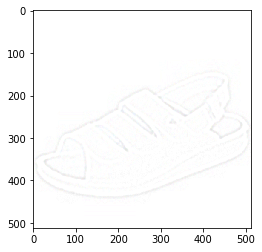

101093


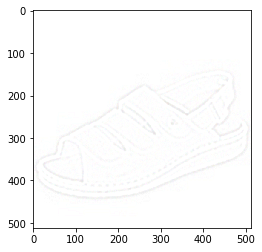

101093


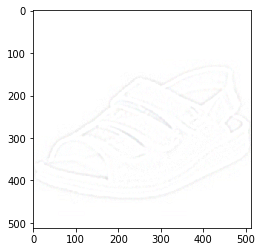

101093


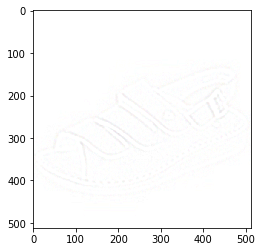

101093


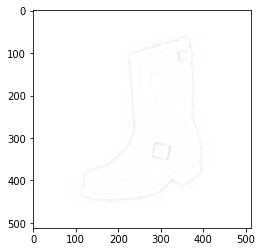

101183


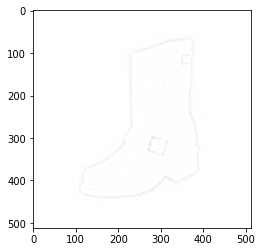

101183


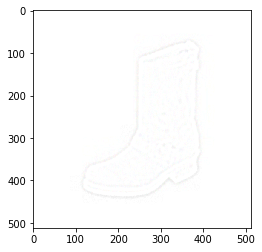

101183


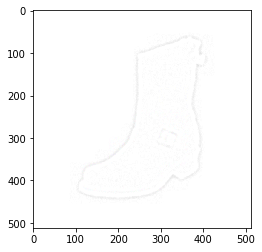

101183


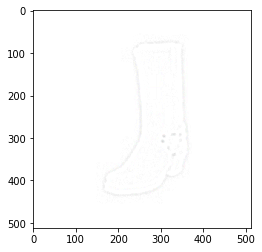

101191


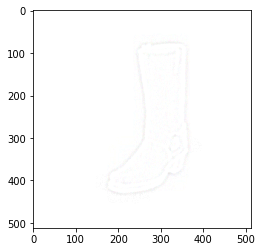

101191


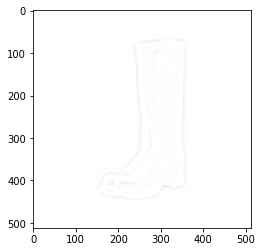

101191


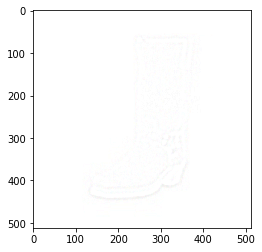

101191


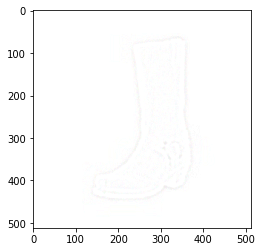

101191


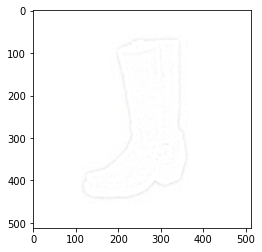

101191


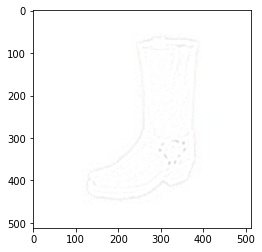

101191


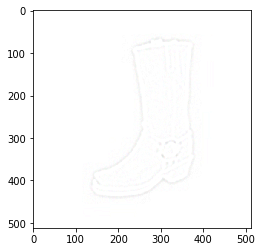

101191


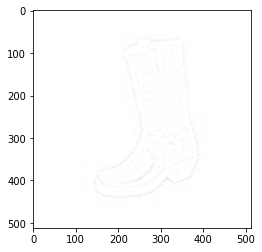

101191


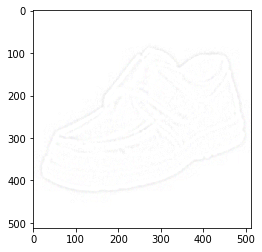

101238


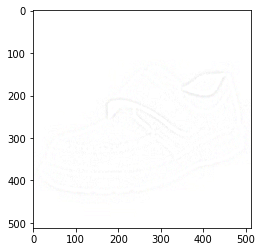

101238


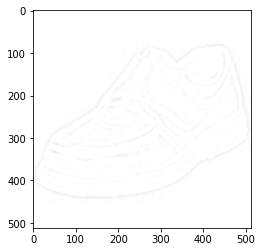

101238


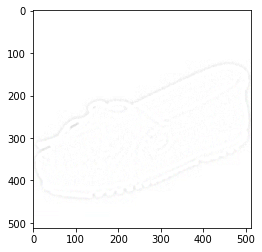

101430


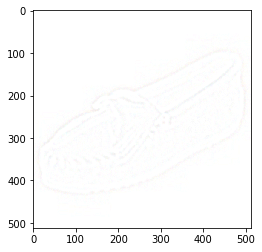

101430


In [38]:
from PIL import Image
from PIL import ImageFilter
import PIL.ImageOps  
from matplotlib import pyplot as plt
import cv2



for i,path in enumerate(shoe_id):
    img = Image.open(path)
    img = img.resize((512,512),Image.ANTIALIAS)
    img = img.filter(PIL.ImageFilter.GaussianBlur(3))
    img = img.filter(ImageFilter.FIND_EDGES)
    img = PIL.ImageOps.invert(img)
    img = np.array(img)
    img[img<200] = 0
    plt.imshow(img)
    plt.show()
    print(shoe_id[path])
    if i>20:
        break

In [32]:
np.unique(img)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24, 231,
       232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,
       245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255], dtype=uint8)

In [17]:
select_att_ind = list(range(4))+list(range(46,65))+list(range(144,151))
for i,att in enumerate(atts_values_pd.keys()[select_att_ind]):
    print(f'{i}:{att}')

0:Category.Shoes
1:Category.Boots
2:Category.Sandals
3:Category.Slippers
4:Closure.Lace.up
5:Closure.Pull.on
6:Closure.Buckle
7:Closure.Ankle.Strap
8:Closure.Hook.and.Loop
9:Closure.Zipper
10:Closure.Slip.On
11:Closure.Elastic.Gore
12:Closure.Ankle.Wrap
13:Closure.Sling.Back
14:Closure.Bungee
15:Closure.Toggle
16:Closure.Adjustable
17:Closure.Snap
18:Closure.Button.Loop
19:Closure.T.Strap
20:Closure.Monk.Strap
21:Closure.Spat.Strap
22:Closure.Belt
23:ToeStyle.Almond
24:ToeStyle.Bump Toe
25:ToeStyle.Apron Toe
26:ToeStyle.Wide Toe Box
27:ToeStyle.Snip Toe
28:ToeStyle.Peep Toe
29:ToeStyle.Medallion


In [27]:
shoe_att[key]

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [34]:
group.keys()

dict_keys(['100627', '100657', '101026', '101093', '101175', '101178', '101182', '101183', '101186', '101191', '101192', '101238', '101404', '101416', '101424', '101430', '101434', '101514', '101985', '102121', '102170', '102179', '102181', '102307', '102393', '102420', '102706', '102848', '103178', '103787', '103789', '103888', '103900', '103902', '104002', '104010', '104011', '104018', '104025', '104027', '104028', '104035', '104038', '104042', '104670', '104676', '104677', '104678', '104691', '104705', '104708', '104710', '104712', '104713', '104717', '104719', '104720', '104730', '104733', '105038', '105112', '105113', '105197', '105210', '105214', '105383', '105436', '105698', '105704', '105772', '105805', '105812', '105965', '105989', '105990', '106070', '106079', '106507', '106635', '106639', '106667', '106701', '106702', '106703', '107213', '107219', '107225', '107227', '107452', '107456', '107535', '107684', '107741', '107757', '107908', '107950', '107999', '108000', '108030',

In [24]:
img_path_list

array([array(['Shoes/Oxfords/Bostonian/100627.72.jpg'], dtype='<U37'),
       array(['Shoes/Oxfords/Bostonian/100627.255.jpg'], dtype='<U38'),
       array(['Shoes/Oxfords/Bostonian/100657.72.jpg'], dtype='<U37'),
       ...,
       array(['Shoes/Heels/J. Renee/8168300.57113.jpg'], dtype='<U38'),
       array(['Shoes/Heels/J. Renee/8168300.384413.jpg'], dtype='<U39'),
       array(['Shoes/Sneakers and Athletic Shoes/Travis Mathew/8169712.2557.jpg'],
      dtype='<U64')], dtype=object)

In [4]:
with open('zap50k/zap50k_shoe_id.json') as fp:
    d = json.load(fp)

In [6]:
len(d)

24194